In [1]:
from torch.utils.tensorboard import SummaryWriter

In [2]:
import torch
import numpy as np
import random


In [3]:
def y_data(tmp_x1,tmp_x2):
    y = tmp_x1**2 +  2*tmp_x2
    return y

from torch.utils.data import Dataset
from torch import  FloatTensor
class UserDataset(Dataset):
    def __init__(self, doc="dataset"):
        self.doc = doc
        x1 = list(range(0,100,3))
        self.x1 =  FloatTensor(x1).view(-1, 1)
        x2 = list(range(0,100,3))
        self.x2 =  FloatTensor(x2).view(-1, 1)
        y = list(map(y_data,x1,x2))
        self.y = FloatTensor(y).view(-1, 1)
 
    def __getitem__(self,index):
        return self.x1[index], self.x2[index],self.y[index]
    
    def __len__(self):
        return len(self.x1)

In [4]:
## 随机种子设置，每次执行后再训练模型可以得到相同loss
random.seed(3407)
np.random.seed(3407)
torch.manual_seed(3407) 

In [5]:
from torch.utils.data import DataLoader
user_dataset = UserDataset()
user_loader = DataLoader(user_dataset, batch_size=32, shuffle=True)

In [6]:
import torch.nn as nn
class reg_model(nn.Module):
    def __init__(self, in_dim, out_dim=1):
        super(reg_model, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
#         self.model = nn.Sequential(nn.Linear(in_dim, 16), nn.ReLU(),nn.Linear(16, out_dim))
        self.fc1 = nn.Linear(2, 16)
        self.act   = nn.ReLU()
        self.fc2 = nn.Linear(16, out_dim)
        self.register_buffer('mean', torch.zeros(out_dim), persistent=False)
        
    def forward(self,x1, x2):
#         y = self.model(x)
        x = torch.cat((x1, x2), dim=1)
        x = self.fc1(x)
        x = self.act(x)
        y = self.fc2(x) + self.mean
        return y

In [36]:
from torch import optim
import torch
model = reg_model(1,1)
criterior = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
writer = SummaryWriter(log_dir=r"G:\ML\PYLearn\jupyter\log")
for i in range(2):
    for data in user_loader:
        x1,x2, y = data
        optimizer.zero_grad()
        pred_y = model(x1,x2)
        loss = criterior(pred_y, y)
        loss.backward()
        optimizer.step()
    for param_tensor in model.state_dict():  # 字典的遍历默认是遍历 key，所以param_tensor实际上是键值
        print(param_tensor, '\t', model.state_dict()[param_tensor])
    print("------------------loss------------------", loss.detach().numpy())
#         writer.add_scalar("train_loss", loss,i)
#     for name, parms in model.named_parameters(): 
#         print('-->name:', name, '-->grad_requirs:',parms, \
#          ' -->grad_value:',parms.grad)
#     for param_tensor in model.state_dict():  # 字典的遍历默认是遍历 key，所以param_tensor实际上是键值
#         print(param_tensor, '\t', model.state_dict()[param_tensor])


fc1.weight 	 tensor([[-0.2694,  0.1531],
        [-0.2477,  0.0217],
        [-0.6537, -0.0335],
        [ 0.6686, -0.4134],
        [ 0.1201,  0.5221],
        [-0.5310, -0.0166],
        [ 0.1456, -0.1204],
        [ 0.1694,  0.5028],
        [-0.2763, -0.2221],
        [ 0.7702, -0.2230],
        [-0.1797,  0.6505],
        [ 0.0204,  0.3966],
        [ 0.1710, -0.2726],
        [ 0.6551,  0.6226],
        [-0.0836, -0.1713],
        [ 0.3487, -0.0654]])
fc1.bias 	 tensor([-0.1027,  0.4742, -0.1861,  0.4799,  0.2508, -0.3902, -0.5208, -0.2870,
         0.3514,  0.1034, -0.4733,  0.8011, -0.3259, -0.1752, -0.6088,  0.5182])
fc2.weight 	 tensor([[-0.0543, -0.2161,  0.1235,  0.1782,  0.0935,  0.0568,  0.0259,  0.1301,
         -0.0478,  0.2728,  0.3644,  0.3564,  0.0979,  0.3294, -0.1119,  0.2285]])
fc2.bias 	 tensor([0.2832])
------------------loss------------------ 50134450.0
fc1.weight 	 tensor([[-0.2694,  0.1531],
        [-0.2477,  0.0217],
        [-0.6537, -0.0335],
        [ 0.

In [8]:
writer.add_graph(model, (x1,x2))
writer.close()

In [9]:
model.state_dict()

OrderedDict([('fc1.weight', tensor([[ 0.4831,  0.4410],
                      [-0.0554,  0.9087],
                      [-0.4157, -0.2391],
                      [ 0.5926,  0.3606],
                      [ 0.1151, -0.4883],
                      [ 0.0661, -0.4727],
                      [-0.0869,  0.9922],
                      [-0.3671,  0.1279],
                      [ 0.8341,  0.3113],
                      [ 0.1338, -0.3689],
                      [ 0.6387,  0.2660],
                      [ 0.1682,  0.8132],
                      [ 0.3095,  0.7375],
                      [-0.1231, -0.3312],
                      [-0.3302, -0.3534],
                      [-0.5844, -0.1470]])),
             ('fc1.bias',
              tensor([ 0.5340, -0.0266,  0.1758,  0.0018, -0.8335,  0.5722, -0.0641, -0.2288,
                      -0.3111, -0.6204,  0.9452,  0.3559,  0.0180,  0.6714,  0.0464, -0.3840])),
             ('fc2.weight',
              tensor([[ 0.3667,  0.4421, -0.2800,  0.5677,  0.1789

In [13]:
x = list(range(0,100))
y = list(map(y_data, x,x))
x = torch.unsqueeze(FloatTensor(x),dim=1)
model.eval()
with torch.no_grad():
    pred_y = model(x, x)

In [20]:
x.shape

torch.Size([100, 1])

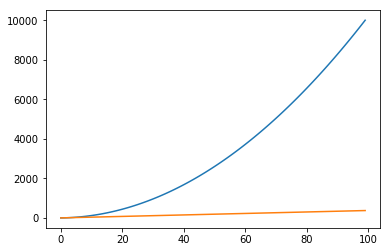

In [14]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x, pred_y.detach().numpy())

In [16]:
nn.Parameter?

Init signature: nn.Parameter(data=None, requires_grad=True)
Docstring:     
A kind of Tensor that is to be considered a module parameter.

Parameters are :class:`~torch.Tensor` subclasses, that have a
very special property when used with :class:`Module` s - when they're
assigned as Module attributes they are automatically added to the list of
its parameters, and will appear e.g. in :meth:`~Module.parameters` iterator.
Assigning a Tensor doesn't have such effect. This is because one might
want to cache some temporary state, like last hidden state of the RNN, in
the model. If there was no such class as :class:`Parameter`, these
temporaries would get registered too.

Args:
    data (Tensor): parameter tensor.
    requires_grad (bool, optional): if the parameter requires gradient. See
        :ref:`excluding-subgraphs` for more details. Default: `True`
File:           c:\programdata\anaconda3\lib\site-packages\torch\nn\parameter.py
Type:           type


In [28]:
class model_cat(nn.Module):
    def __init__(self, data, kpi_model,idx):
        super(model_cat, self).__init__()
        self.x = nn.Parameter(data, requires_grad=True)
        self.idx = idx
        self.model = kpi_model
        
    def forward(self, x, z):
        out = self.model(self.x[self.idx,:], z)
        return out

In [51]:
tmp_data = torch.ones((200,1))
cat_net = model_cat(tmp_data, model, np.arange(4, 104))
optimizer = optim.Adam(params=[cat_net.x], lr=0.01)
for i in range(100):
    optimizer.zero_grad()
    loss = cat_net(tmp_data, x).mean()
    loss.backward()
    
#     print(cat_net.x.grad)
    if i == 1:
        print('-----')
        optimizer.step()
    cat_net.x.grad = torch.ones((200,1))
    optimizer.step()
#     print(cat_net.x.grad)

-----


In [47]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([16, 1])
fc1.bias 	 torch.Size([16])
fc2.weight 	 torch.Size([1, 16])
fc2.bias 	 torch.Size([1])


In [49]:
optimizer.state_dict?

Signature: optimizer.state_dict()
Docstring:
Returns the state of the optimizer as a :class:`dict`.

It contains two entries:

* state - a dict holding current optimization state. Its content
    differs between optimizer classes.
* param_groups - a dict containing all parameter groups
File:      c:\programdata\anaconda3\lib\site-packages\torch\optim\optimizer.py
Type:      method


In [48]:
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {0: {'step': 6000, 'exp_avg': tensor([[ 3.4952e+04],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 5.6052e-45],
        [ 2.2232e+04],
        [-8.6573e+04],
        [ 4.2950e+04],
        [ 2.2401e+04],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.0213e+05],
        [-1.3310e+05],
        [ 2.1657e+04],
        [ 0.0000e+00],
        [ 0.0000e+00]]), 'exp_avg_sq': tensor([[1.7020e+10],
        [0.0000e+00],
        [0.0000e+00],
        [3.4815e+04],
        [9.8124e+09],
        [1.4238e+11],
        [2.4256e+10],
        [9.9775e+09],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [1.4763e+11],
        [3.3066e+11],
        [9.3116e+09],
        [0.0000e+00],
        [0.0000e+00]])}, 1: {'step': 6000, 'exp_avg': tensor([ 3.8946e+02,  0.0000e+00,  0.0000e+00,  5.6052e-45,  1.9953e+02,
        -8.0688e+02,  4.7163e+02,  2.0104e+02,  0.0000e+00,  0.0000e+00,
         5.6052e-45, -2.

In [50]:
torch.save({
            'epoch': 1000,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, r"G:\ML\PYLearn\jupyter\log\model.pth")

In [52]:
checkpoint = torch.load(r"G:\ML\PYLearn\jupyter\log\model.pth")
# checkpoint

In [53]:
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [42]:
list(model.named_parameters())

[('fc1.weight', Parameter containing:
  tensor([[ 0.8607],
          [-0.4612],
          [ 1.1627],
          [ 0.6596],
          [-0.1963],
          [-0.2116],
          [-0.9390],
          [-0.6986],
          [ 1.1903],
          [-0.2990],
          [-0.2648],
          [ 1.0166],
          [ 0.5990],
          [ 0.3458],
          [ 1.3209],
          [-0.2365]], requires_grad=True)), ('fc1.bias', Parameter containing:
  tensor([-0.5419, -0.1460,  1.1332, -0.5549, -1.1715, -0.0499,  0.4957, -0.0812,
           0.3717, -0.2156, -0.5980,  0.3973, -0.7329, -0.0947,  0.6900, -0.8912],
         requires_grad=True)), ('fc2.weight', Parameter containing:
  tensor([[ 0.3370, -0.0976,  0.4735,  0.1556,  0.1632,  0.1524, -0.1927,  0.1632,
            0.4725,  0.0417, -0.0498,  0.3723,  0.1891,  0.3840,  0.5329,  0.0873]],
         requires_grad=True)), ('fc2.bias', Parameter containing:
  tensor([0.3488], requires_grad=True))]

In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.8607],
         [-0.4612],
         [ 1.1627],
         [ 0.6596],
         [-0.1963],
         [-0.2116],
         [-0.9390],
         [-0.6986],
         [ 1.1903],
         [-0.2990],
         [-0.2648],
         [ 1.0166],
         [ 0.5990],
         [ 0.3458],
         [ 1.3209],
         [-0.2365]], requires_grad=True), Parameter containing:
 tensor([-0.5419, -0.1460,  1.1332, -0.5549, -1.1715, -0.0499,  0.4957, -0.0812,
          0.3717, -0.2156, -0.5980,  0.3973, -0.7329, -0.0947,  0.6900, -0.8912],
        requires_grad=True), Parameter containing:
 tensor([[ 0.3370, -0.0976,  0.4735,  0.1556,  0.1632,  0.1524, -0.1927,  0.1632,
           0.4725,  0.0417, -0.0498,  0.3723,  0.1891,  0.3840,  0.5329,  0.0873]],
        requires_grad=True), Parameter containing:
 tensor([0.3488], requires_grad=True)]

### profiler to analyze the execution time

In [ ]:
from torch.profiler import profile, record_function, ProfilerActivity
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    with record_function("model_inference"):
        model(x)

## GAN 模型定义

In [183]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
        nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
        nn.BatchNorm2d(ngf*8),
        nn.ReLU(True),
        # state size. ``(ngf*8) x 4 x 4``
        nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf * 4),
        nn.ReLU(True),
        # state size. ``(ngf*4) x 8 x 8``
        nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf * 2),
        nn.ReLU(True),
        # state size. ``(ngf*2) x 16 x 16``
        nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf),
        nn.ReLU(True),
        # state size. ``(ngf) x 32 x 32``
        nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
        nn.Tanh()
        )
    
    def forward(self, input):
        return self.main(input)

In [ ]:
ngpu = 1
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)